In [1]:
!nvidia-smi

Wed Dec 11 08:07:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.2.103 -q

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qbx39kFwvXabILCGJVyf")
project = rf.workspace("custom-yolov5-o0hdb").project("leukemia-cancer-detection")
version = project.version(6)
dataset = version.download("yolov8-obb")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Leukemia-Cancer-Detection-6 in yolov8-obb:: 100%|██████████| 15062/15062 [00:02<00:00, 5913.50it/s]


In [6]:
import yaml

with open(f'{dataset.location}/data.yaml', 'r') as f:
    data = yaml.safe_load(f)
data['train'] = '../train/images'
data['val'] = '../valid/images'
data['test'] = '../test/images'
if 'path' in data:
  del data['path']
with open(f'{dataset.location}/data.yaml', 'w') as f:
    yaml.dump(data, f, sort_keys=False)

## Train a YOLOv8 OBB Object Detection Model


In [7]:
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=15, imgsz=640)

100%|██████████| 6.26M/6.26M [00:00<00:00, 303MB/s]

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/datasets/Leukemia-Cancer-Detection-6/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=Fa

100%|██████████| 755k/755k [00:00<00:00, 119MB/s]


Overriding model.yaml nc=15 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 216MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/Leukemia-Cancer-Detection-6/train/labels... 6591 images, 21 backgrounds, 0 corrupt: 100%|██████████| 6591/6591 [00:12<00:00, 517.17it/s]

train: WARNING ⚠️ /content/datasets/Leukemia-Cancer-Detection-6/train/images/WBC-Malignant-Pre-411_jpg.rf.0da19101b1182e95a36d54cd25009522.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Leukemia-Cancer-Detection-6/train/images/WBC-Malignant-Pre-411_jpg.rf.8019f9e04d0e2dea1531be7f06eb3655.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Leukemia-Cancer-Detection-6/train/images/WBC-Malignant-Pre-411_jpg.rf.bee726c8b7eb14686e7ab83a3c249626.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Leukemia-Cancer-Detection-6/train/images/WBC-Malignant-Pre-421_jpg.rf.b465d840354a031e5db44e234b5e2776.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Leukemia-Cancer-Detection-6/train/images/WBC-Malignant-Pre-421_jpg.rf.bf3b9c888215509e3ed7398932f90a2d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Leukemia-Cancer-Detection-6/train/images/WBC-Malignant-Pre-421_jpg.rf.fbaaf0540f537d1a702814653db60bc8.jpg: 1

train: New cache created: /content/datasets/Leukemia-Cancer-Detection-6/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/datasets/Leukemia-Cancer-Detection-6/valid/labels... 622 images, 1 backgrounds, 0 corrupt: 100%|██████████| 622/622 [00:01<00:00, 355.22it/s]

val: WARNING ⚠️ /content/datasets/Leukemia-Cancer-Detection-6/valid/images/WBC-Malignant-Pre-427_jpg.rf.58a975d9c880187b9504e6530c88e715.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/Leukemia-Cancer-Detection-6/valid/images/WBC-Malignant-Pre-859_jpg.rf.7b3601adc0b6411dd5fb194628d9eb20.jpg: 1 duplicate labels removed


val: New cache created: /content/datasets/Leukemia-Cancer-Detection-6/valid/labels.cache
Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.63G      1.067      1.326      1.698        231        640: 100%|██████████| 412/412 [03:10<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.43it/s]

                   all        622       7665      0.897      0.907      0.956      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.34G     0.8991     0.6743      1.601        273        640: 100%|██████████| 412/412 [02:50<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.87it/s]


                   all        622       7665      0.923      0.917      0.979      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.27G     0.8672     0.6145      1.592        226        640: 100%|██████████| 412/412 [02:50<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.26it/s]

                   all        622       7665       0.91      0.902      0.975      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.38G      0.845     0.5757      1.589        211        640: 100%|██████████| 412/412 [02:52<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.13it/s]

                   all        622       7665      0.948      0.959      0.986      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.38G     0.8255     0.5371       1.58        245        640: 100%|██████████| 412/412 [02:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.99it/s]

                   all        622       7665       0.95      0.966      0.988      0.852


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.55G     0.7466     0.4679      1.538        173        640: 100%|██████████| 412/412 [02:38<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.29it/s]


                   all        622       7665      0.927      0.956      0.983       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.25G     0.7317      0.453       1.53        162        640: 100%|██████████| 412/412 [02:26<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.83it/s]

                   all        622       7665      0.956      0.977       0.99      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.19G     0.7147     0.4278      1.521        113        640: 100%|██████████| 412/412 [02:31<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.10it/s]

                   all        622       7665      0.965      0.979      0.991      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.23G     0.7064     0.4178      1.522        155        640: 100%|██████████| 412/412 [02:27<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.84it/s]

                   all        622       7665      0.961      0.979       0.99      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.25G     0.6912     0.4042      1.502        219        640: 100%|██████████| 412/412 [02:30<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.35it/s]

                   all        622       7665       0.96      0.982      0.991       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      2.25G     0.6804     0.3966      1.503        209        640: 100%|██████████| 412/412 [02:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.01it/s]

                   all        622       7665      0.968       0.98      0.991      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.23G     0.6734     0.3929      1.494        202        640: 100%|██████████| 412/412 [02:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.30it/s]

                   all        622       7665      0.968      0.981      0.991      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.24G     0.6616      0.384      1.486        176        640: 100%|██████████| 412/412 [02:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.85it/s]


                   all        622       7665      0.968      0.981       0.99      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.21G     0.6551     0.3733      1.486        170        640: 100%|██████████| 412/412 [02:30<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.80it/s]

                   all        622       7665      0.973      0.976      0.991      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.24G     0.6389     0.3682      1.473        125        640: 100%|██████████| 412/412 [02:27<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.33it/s]

                   all        622       7665      0.973      0.978      0.991      0.882



15 epochs completed in 0.700 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.7MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.7MB

Validating runs/obb/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,999 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:24<00:00,  1.62it/s]


                   all        622       7665      0.973      0.978      0.991      0.882
                Benign         96        990      0.975      0.966      0.992       0.87
                 Early        188       1381      0.973      0.983      0.993      0.859
                   Pre        212       4581      0.962      0.976      0.989       0.85
                   Pro        125        713       0.98      0.986       0.99      0.951
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/obb/train


In [8]:
model = YOLO('runs/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])


image 1/1 /content/datasets/Leukemia-Cancer-Detection-6/test/images/WBC-Benign-410_jpg.rf.e5a298eb03499dad4745aca0f1f646be.jpg: 640x640 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Benign', 1: 'Early', 2: 'Pre', 3: 'Pro'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[236, 222, 224],
        [234, 221, 223],
        [232, 219, 221],
        ...,
        [210, 176, 176],
        [209, 175, 175],
        [208, 174, 174]],

       [[236, 222, 224],
        [235, 221, 223],
        [232, 219, 221],
        ...,
        [210, 176, 176],
        [209, 175, 175],
        [208, 174, 174]],

       [[237, 221, 222],
        [234, 220, 221],
        [233, 221, 221],
        ...,
        [208, 177, 176],
        [207, 176, 175],
        [206, 175, 174]],

       ...,

       [[240, 224, 225],
        [240, 224, 2

In [9]:
!pip install supervision==0.24.0 -q

import supervision as sv
import cv2

# Daftar nama kelas
class_names = ['benign', 'early', 'pre', 'pro']

# Buat objek Detections dari Ultralytics
detections = sv.Detections.from_ultralytics(results[0])

# Membuat label dengan format "class_name: confidence"
labels = [
    f"{class_names[class_id]}: {confidence:.2f}"
    for class_id, confidence in zip(detections.class_id, detections.confidence)
]

# Annotator untuk bounding box dan label
oriented_box_annotator = sv.OrientedBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Membaca gambar
image = cv2.imread(file_name)

# Menambahkan bounding box dan label ke gambar
annotated_frame = oriented_box_annotator.annotate(scene=image, detections=detections)
annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

# Resize gambar agar proporsional
annotated_frame = sv.resize_image(
    annotated_frame,
    resolution_wh=(900, 900),
    keep_aspect_ratio=True
)

# Tampilkan gambar menggunakan PIL
sv.cv2_to_pillow(annotated_frame).show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 10.0 MB/s eta 0:00:00


In [10]:
import random
import cv2
import supervision as sv
from ultralytics import YOLO

# Load model
model = YOLO('yolov8n-obb.pt')

# Prediksi awal
results = model(file_name)
detections = sv.Detections.from_ultralytics(results[0])

# Augmentasi gambar hasil prediksi
image = cv2.imread(file_name)
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # Rotasi gambar
flipped_image = cv2.flip(image, 1)  # Flipping gambar horizontal

# Prediksi ulang pada gambar augmentasi
results_rotated = model(rotated_image)
results_flipped = model(flipped_image)

# Gabungkan hasil prediksi (optional: rata-rata atau ensemble)
detections_rotated = sv.Detections.from_ultralytics(results_rotated[0])
detections_flipped = sv.Detections.from_ultralytics(results_flipped[0])

# Visualisasi hasil akhir
annotator = sv.OrientedBoxAnnotator()
final_image = annotator.annotate(scene=image, detections=detections)
sv.cv2_to_pillow(final_image).show()


image 1/1 /content/datasets/Leukemia-Cancer-Detection-6/test/images/WBC-Benign-410_jpg.rf.e5a298eb03499dad4745aca0f1f646be.jpg: 1024x1024 (no detections), 14.2ms
Speed: 7.7ms preprocess, 14.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 (no detections), 14.2ms
Speed: 6.3ms preprocess, 14.2ms inference, 0.5ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 (no detections), 14.2ms
Speed: 5.9ms preprocess, 14.2ms inference, 0.5ms postprocess per image at shape (1, 3, 1024, 1024)


In [11]:
# Import library
from ultralytics import YOLO
import os
import random
import supervision as sv
import cv2

# OPTIONAL: Export the model to other formats like ONNX, TensorRT, etc.
model.export(format="onnx", dynamic=True, simplify=True)  # Export to ONNX format

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'yolov8n-obb.pt' with input shape (1, 3, 1024, 1024) BCHW and output shape(s) (1, 20, 21504) (6.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 163.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 241.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 230.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 246.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 27.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONN

'yolov8n-obb.onnx'

Saving Snap_0s08.jpg to Snap_0s08.jpg

image 1/1 /content/datasets/Snap_0s08.jpg: 480x640 9.0ms
Speed: 3.5ms preprocess, 9.0ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


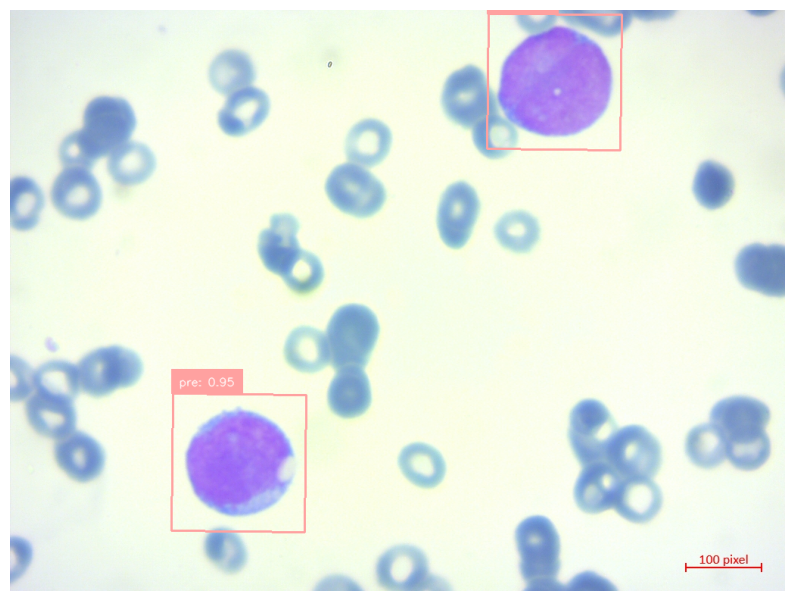

In [17]:
# prompt: buatkan code untuk menguji modelnya menggunakan gambar yang diinput menggunakan input google colab lalu ditampilkan gambar hasil detectionnya menggunakan matplotlib

import matplotlib.pyplot as plt
import cv2
import supervision as sv
from ultralytics import YOLO

# Load model
model = YOLO('runs/obb/train/weights/best.pt')

# Input gambar dari Google Colab
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # Prediksi pada gambar yang diupload
  results = model(fn)
  detections = sv.Detections.from_ultralytics(results[0])

  # Daftar nama kelas
  class_names = ['benign', 'early', 'pre', 'pro']

  # Membuat label
  labels = [
      f"{class_names[class_id]}: {confidence:.2f}"
      for class_id, confidence in zip(detections.class_id, detections.confidence)
  ]

  # Annotator
  oriented_box_annotator = sv.OrientedBoxAnnotator()
  label_annotator = sv.LabelAnnotator()

  # Membaca gambar
  image = cv2.imread(fn)

  # Annotasi gambar
  annotated_frame = oriented_box_annotator.annotate(scene=image, detections=detections)
  annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

  # Tampilkan gambar hasil deteksi menggunakan Matplotlib
  plt.figure(figsize=(10, 10))
  plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()